In [104]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.constants as const
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.rcParams['legend.facecolor'] = 'white'

In [105]:
p21_p28 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/S21_S11_GapSweep_0.21to0.28.csv', skiprows=4)
p15_p2 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_S21S11_GapSweep_0.15to0.20.csv', skiprows=4)
p1_p14 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_S21S11_GapSweep0.1to0.14.csv', skiprows=4)
p29_p4 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_S21S11_GapSweep0.29to0.4.csv', skiprows=4)
p4_p6 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_S21_S11_GapSweep_0.4to0.6.csv', skiprows=4)
p41_p6 = p4_p6.loc[21:]
p61_p76 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_S21S11_GapSweep_0.6to0.75.csv', skiprows=4)

p1_1p5_3p4GHz = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/0.1 to 1.5/REAL_S21S11_GapSweep_0.1to1.5.csv', skiprows=4)
p1_1p5_3p4GHz

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.0001,3.4155,-3.849967,-7.866684
1,0.0001,3.4156,-5.139305,-2.598708
2,0.0001,3.4157,-8.063576,-1.040910
3,0.0001,3.4158,-9.651232,-0.693295
4,0.0001,3.4159,-10.615323,-0.556647
...,...,...,...,...
1546,0.0015,3.4161,-22.389992,-0.110884
1547,0.0015,3.4162,-11.251864,-1.080560
1548,0.0015,3.4163,-35.647635,-0.078216
1549,0.0015,3.4164,-30.557075,-0.079000


In [106]:
p1_1p5_3p4GHz

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.0001,3.4155,-3.849967,-7.866684
1,0.0001,3.4156,-5.139305,-2.598708
2,0.0001,3.4157,-8.063576,-1.040910
3,0.0001,3.4158,-9.651232,-0.693295
4,0.0001,3.4159,-10.615323,-0.556647
...,...,...,...,...
1546,0.0015,3.4161,-22.389992,-0.110884
1547,0.0015,3.4162,-11.251864,-1.080560
1548,0.0015,3.4163,-35.647635,-0.078216
1549,0.0015,3.4164,-30.557075,-0.079000


In [107]:
def separate_p1_2(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val]
        chunks.append(subset)
    
    return chunks

In [108]:
p1p14_sep = separate_p1_2(p1_p14)
p15p2_sep = separate_p1_2(p15_p2)
p21p28_sep = separate_p1_2(p21_p28)
p21p4_sep = separate_p1_2(p29_p4)
p41p6_sep = separate_p1_2(p41_p6)
p61p76_sep = separate_p1_2(p61_p76)

/var/folders/ky/hnfmqvvd74x03rjxm1q6hf580000gn/T/ipykernel_77574/905416050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision


In [116]:
len(p21p28_sep)
p21p28_sep[6]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
126,0.00027,3.1986,-21.095909,-0.239181
127,0.00027,3.1987,-20.662524,-0.245352
128,0.00027,3.1988,-20.125692,-0.253951
129,0.00027,3.1989,-19.442747,-0.266632
130,0.00027,3.1990,-18.542397,-0.286922
131,0.00027,3.1991,-17.295118,-0.323493
132,0.00027,3.1992,-15.435230,-0.403764
133,0.00027,3.1993,-12.300739,-0.661016
134,0.00027,3.1994,-5.873048,-2.970446
135,0.00027,3.1995,-8.267841,-1.663013


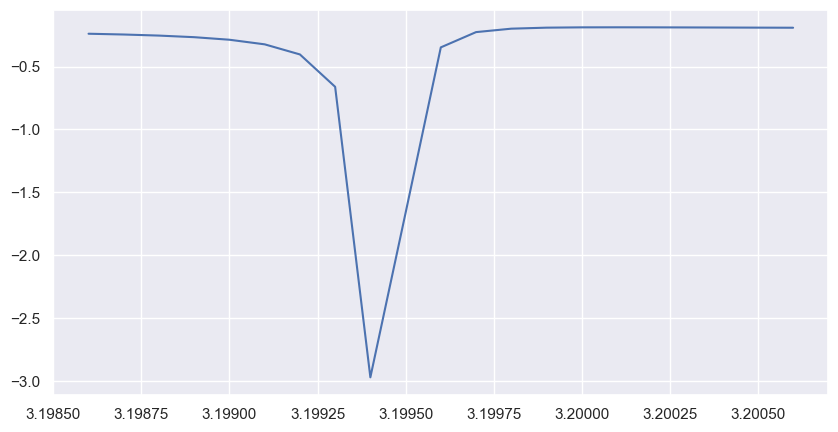

In [117]:
plt.figure(figsize = (10,5))
plt.plot(p21p28_sep[6]['freq (GHz)'], p21p28_sep[6]['S21 (1)'])

In [121]:
print(p21p28_sep[6][p21p28_sep[6]['freq (GHz)']==3.1991])
print(p21p28_sep[6][p21p28_sep[6]['freq (GHz)']==3.1998])

     % x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
131        0.00027      3.1991 -17.295118 -0.323493
     % x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
138        0.00027      3.1998 -30.147193 -0.198989


In [122]:
3.1991 - 3.1998

-0.000700000000000145

In [123]:
3.1665 - 3.1695

-0.0030000000000001137

In [118]:
p21p28_sep[6]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
126,0.00027,3.1986,-21.095909,-0.239181
127,0.00027,3.1987,-20.662524,-0.245352
128,0.00027,3.1988,-20.125692,-0.253951
129,0.00027,3.1989,-19.442747,-0.266632
130,0.00027,3.1990,-18.542397,-0.286922
131,0.00027,3.1991,-17.295118,-0.323493
132,0.00027,3.1992,-15.435230,-0.403764
133,0.00027,3.1993,-12.300739,-0.661016
134,0.00027,3.1994,-5.873048,-2.970446
135,0.00027,3.1995,-8.267841,-1.663013


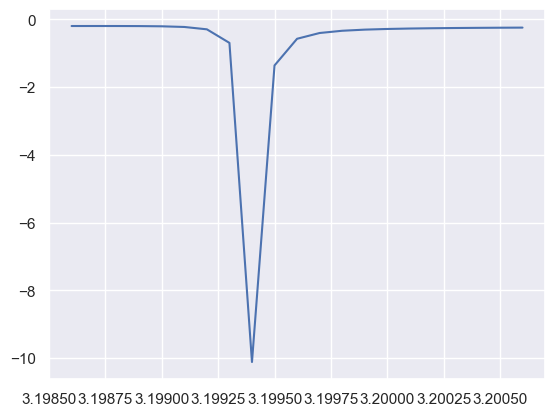

In [102]:
plt.plot(p15p2_sep[0]['freq (GHz)'], p15p2_sep[0]['S21 (1)'])

In [57]:
len(p61p76_sep)

16

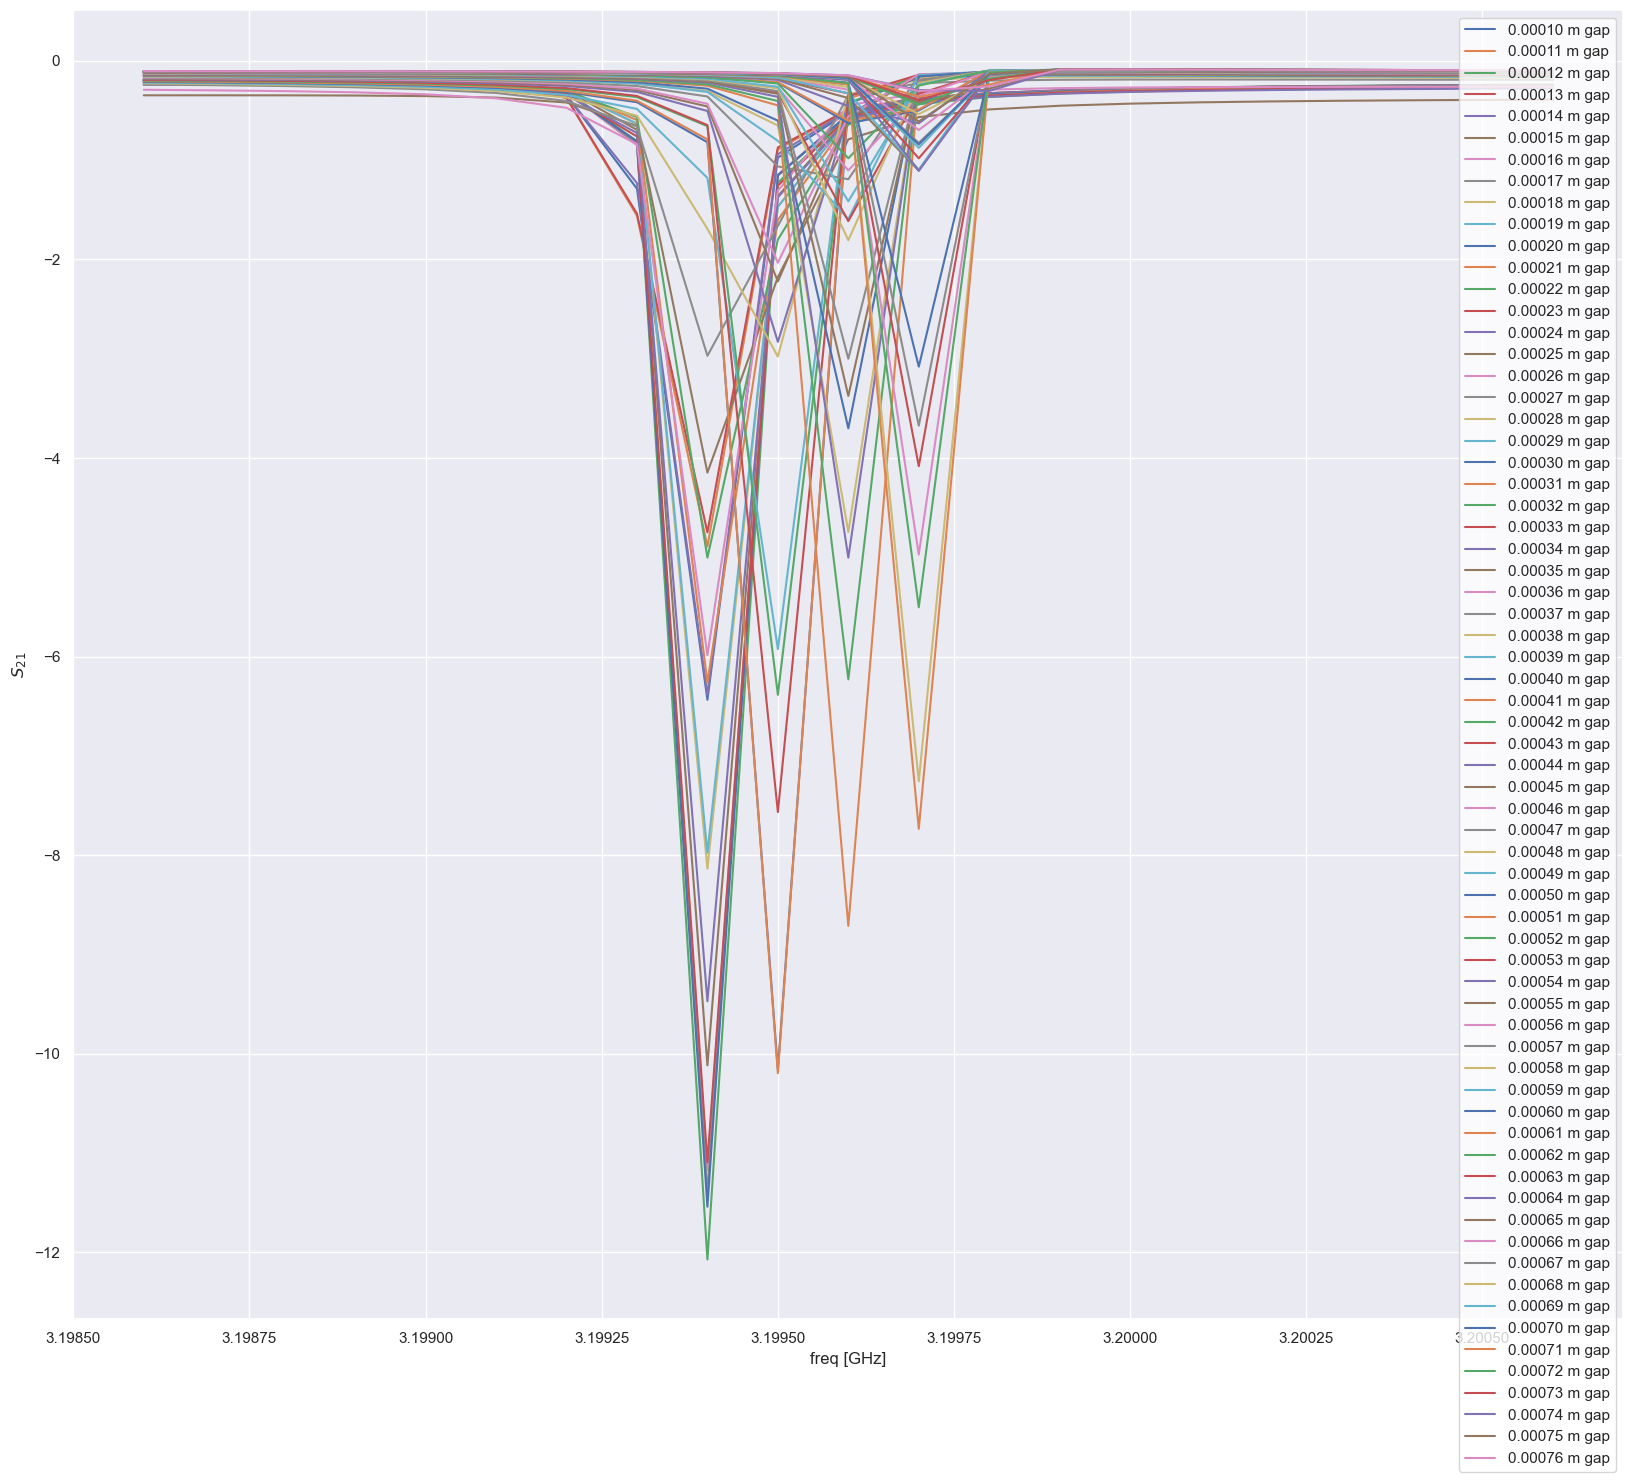

In [58]:
fig, ax = plt.subplots(figsize = (20,17))
for i in range(5): 
    ax.plot(p1p14_sep[i]['freq (GHz)'], p1p14_sep[i]['S21 (1)'], label=f"{p1p14_sep[i]['% x_strip (m)'].iloc[0]:.5f} m gap")
for j in range(6):
    ax.plot(p15p2_sep[j]['freq (GHz)'], p15p2_sep[j]['S21 (1)'], label=f"{p15p2_sep[j]['% x_strip (m)'].iloc[0]:.5f} m gap")
for k in range(8):  
    ax.plot(p21p28_sep[k]['freq (GHz)'], p21p28_sep[k]['S21 (1)'], label=f"{p21p28_sep[k]['% x_strip (m)'].iloc[0]:.5f} m gap")
for l in range(12):
    ax.plot(p21p4_sep[l]['freq (GHz)'], p21p4_sep[l]['S21 (1)'], label=f"{p21p4_sep[l]['% x_strip (m)'].iloc[0]:.5f} m gap")
for m in range(20):
    ax.plot(p41p6_sep[m]['freq (GHz)'], p41p6_sep[m]['S21 (1)'], label=f"{p41p6_sep[m]['% x_strip (m)'].iloc[0]:.5f} m gap")
for n in range(16):
    ax.plot(p61p76_sep[n]['freq (GHz)'], p61p76_sep[n]['S21 (1)'], label=f"{p61p76_sep[n]['% x_strip (m)'].iloc[0]:.5f} m gap")

ax.grid(True)
ax.set_xlabel('freq [GHz]')
ax.set_ylabel(r'$S_{21}$')
ax.legend(facecolor='white')

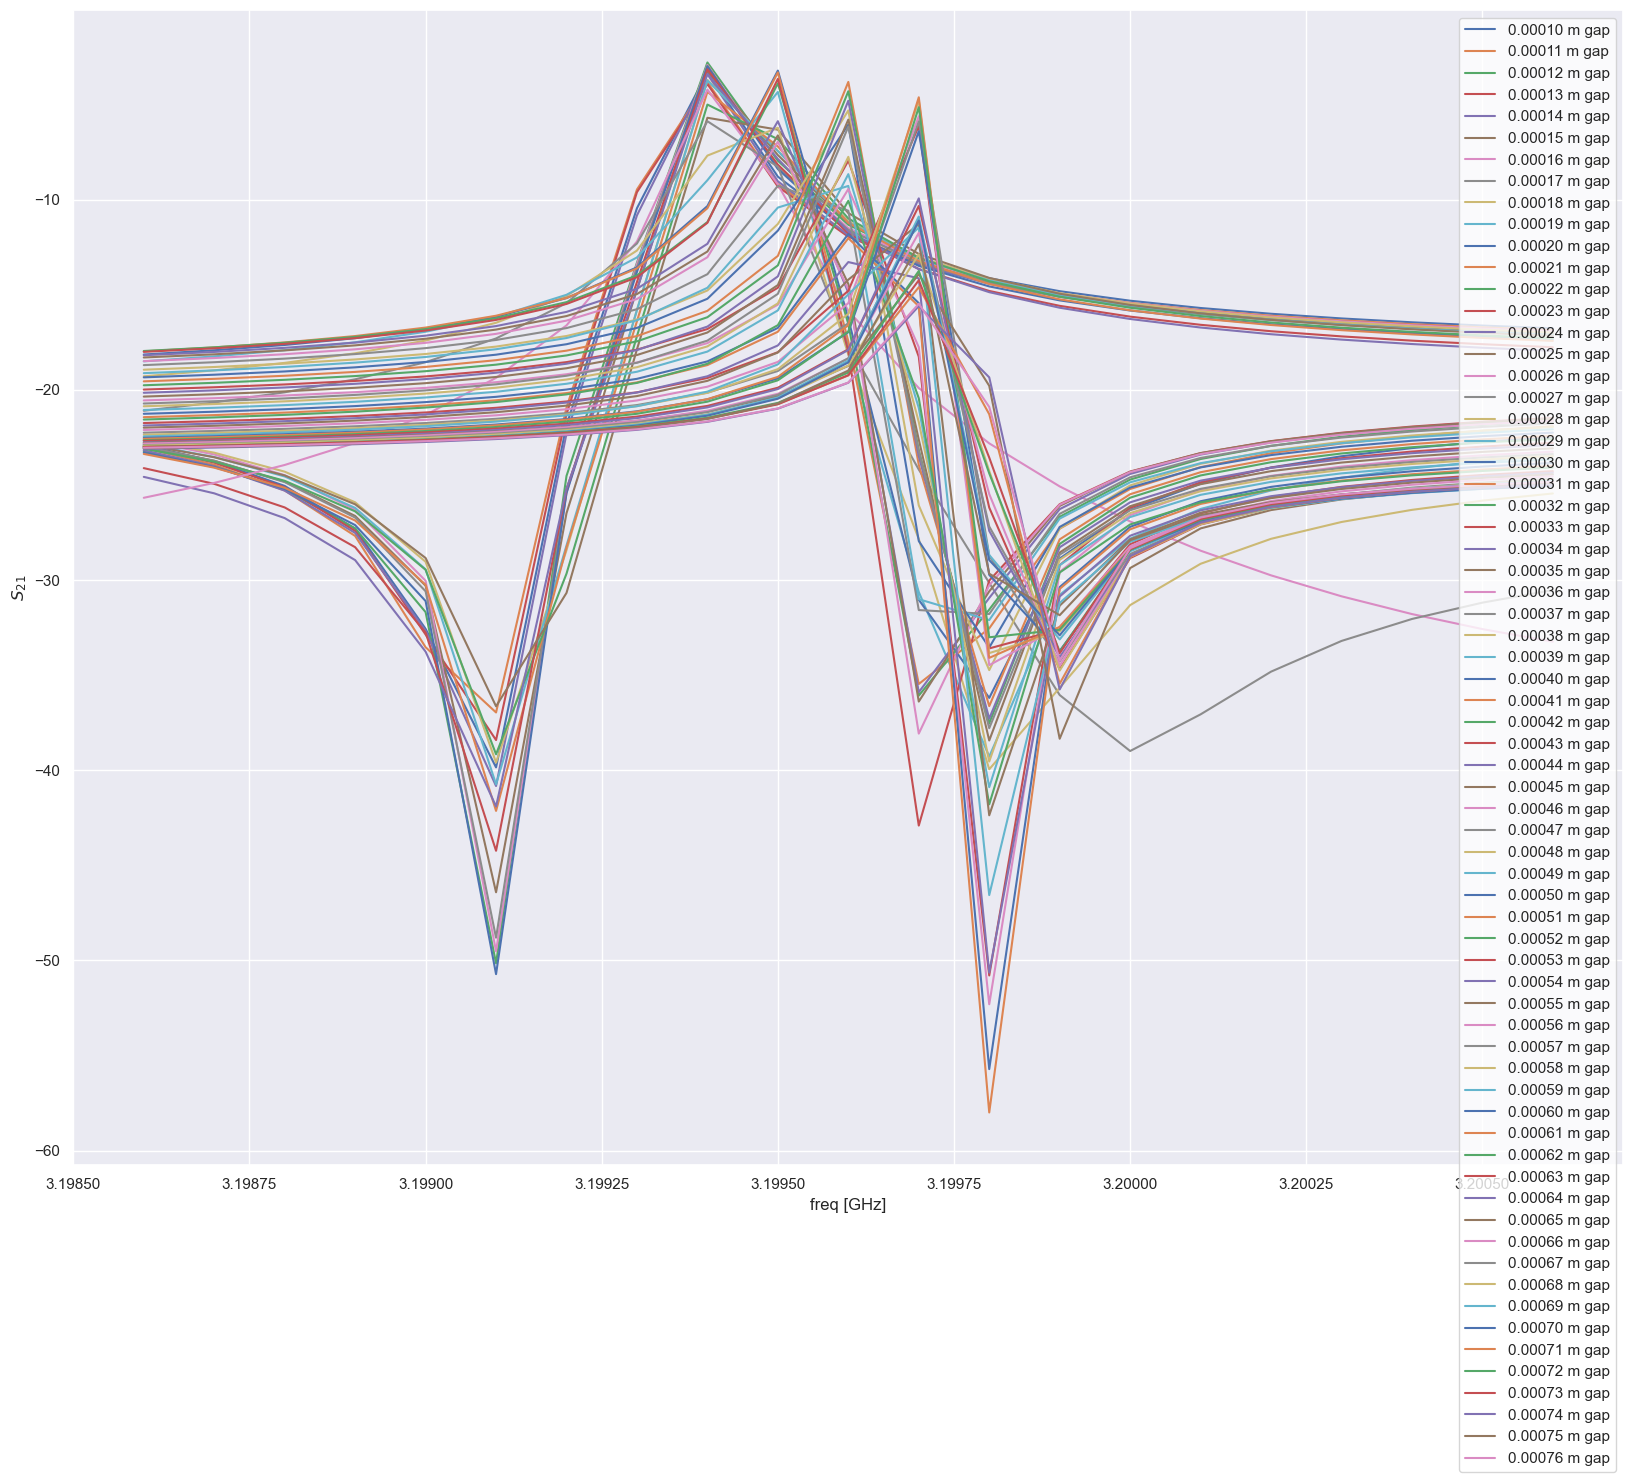

In [59]:
fig, ax = plt.subplots(figsize = (20,15))
for i in range(5): 
    ax.plot(p1p14_sep[i]['freq (GHz)'], p1p14_sep[i]['S11 (1)'], label=f"{p1p14_sep[i]['% x_strip (m)'].iloc[0]:.5f} m gap")
for j in range(6):
    ax.plot(p15p2_sep[j]['freq (GHz)'], p15p2_sep[j]['S11 (1)'], label=f"{p15p2_sep[j]['% x_strip (m)'].iloc[0]:.5f} m gap")
for k in range(8):  
    ax.plot(p21p28_sep[k]['freq (GHz)'], p21p28_sep[k]['S11 (1)'], label=f"{p21p28_sep[k]['% x_strip (m)'].iloc[0]:.5f} m gap")
for l in range(12):
    ax.plot(p21p4_sep[l]['freq (GHz)'], p21p4_sep[l]['S11 (1)'], label=f"{p21p4_sep[l]['% x_strip (m)'].iloc[0]:.5f} m gap")
for m in range(20):
    ax.plot(p41p6_sep[m]['freq (GHz)'], p41p6_sep[m]['S11 (1)'], label=f"{p41p6_sep[m]['% x_strip (m)'].iloc[0]:.5f} m gap")
for n in range(16):
    ax.plot(p61p76_sep[n]['freq (GHz)'], p61p76_sep[n]['S11 (1)'], label=f"{p61p76_sep[n]['% x_strip (m)'].iloc[0]:.5f} m gap")
ax.grid(True)
ax.set_xlabel('freq [GHz]')
ax.set_ylabel(r'$S_{21}$')
ax.legend(facecolor='white')

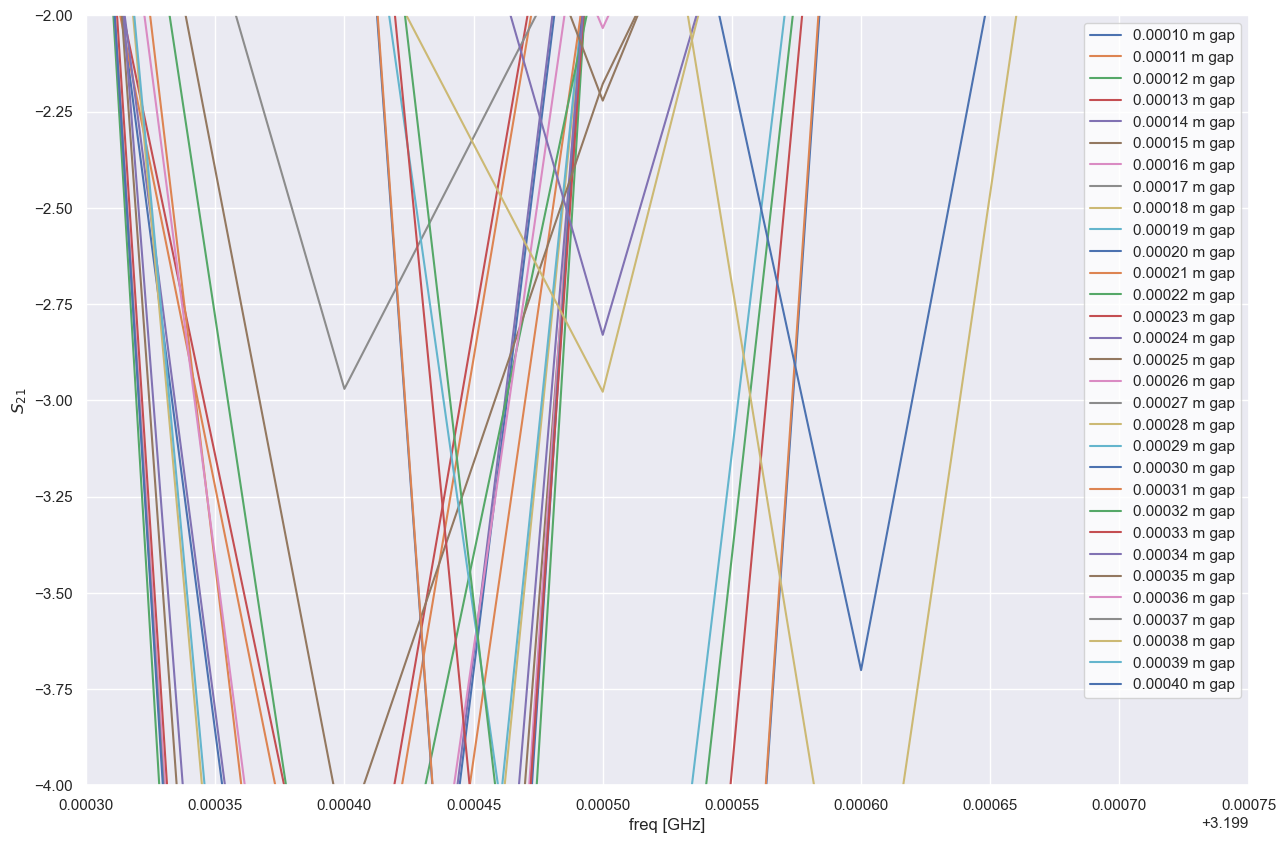

In [60]:
fig, ax = plt.subplots(figsize = (15,10))
for i in range(5): 
    ax.plot(p1p14_sep[i]['freq (GHz)'], p1p14_sep[i]['S21 (1)'], label=f"{p1p14_sep[i]['% x_strip (m)'].iloc[0]:.5f} m gap")
for j in range(6):
    ax.plot(p15p2_sep[j]['freq (GHz)'], p15p2_sep[j]['S21 (1)'], label=f"{p15p2_sep[j]['% x_strip (m)'].iloc[0]:.5f} m gap")
for k in range(8):  
    ax.plot(p21p28_sep[k]['freq (GHz)'], p21p28_sep[k]['S21 (1)'], label=f"{p21p28_sep[k]['% x_strip (m)'].iloc[0]:.5f} m gap")
for l in range(12):
    ax.plot(p21p4_sep[l]['freq (GHz)'], p21p4_sep[l]['S21 (1)'], label=f"{p21p4_sep[l]['% x_strip (m)'].iloc[0]:.5f} m gap")
ax.grid(True)
ax.set_xlim(3.1993, 3.19975)
ax.set_ylim(-4, -2)
ax.set_xlabel('freq [GHz]')
ax.set_ylabel(r'$S_{21}$')
ax.legend()

In [61]:
# okay now trying to isolate the ones near -3 dB

all_gaps = pd.concat([p1_p14, p15_p2, p21_p28, p29_p4])



In [62]:
near_3dB = all_gaps.loc[(all_gaps['S21 (1)']<-2.5) & (all_gaps['S21 (1)']>-4.5)]
near_3dB

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
92,0.00025,3.1994,-5.690863,-4.146674
134,0.00027,3.1994,-5.873048,-2.970446
156,0.00028,3.1995,-6.214591,-2.977948
114,0.00034,3.1995,-5.870168,-2.830128
241,0.00040,3.1996,-6.049655,-3.700996


In [63]:
def separate_dips(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # Normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val].copy()  # <— this is the key fix
        subset['dip_mag'] = np.abs(subset['S21 (1)'].max()) - np.abs(subset['S21 (1)'].min())
        chunks.append(subset)
    
    return chunks

In [64]:
def separate_get_gaps_dips(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # Normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val].copy()  # <— this is the key fix
        subset['dip_mag'] = np.abs(subset['S21 (1)'].max()) - np.abs(subset['S21 (1)'].min())
        chunks.append(subset)

    gaps_dips_chunks = []
    for chunk in range(len(chunks)):
        dips_pair = [chunks[chunk]['% x_strip (m)'].iloc[0], chunks[chunk]['dip_mag'].iloc[0]]
        gaps_dips_chunks.append(dips_pair)
    
    return np.array(gaps_dips_chunks)

In [65]:
testing3 = separate_get_gaps_dips(p1_p14)

In [66]:
testing3

array([[ 1.00000000e-04, -6.24373046e+00],
       [ 1.10000000e-04, -4.70010870e+00],
       [ 1.20000000e-04, -1.18794606e+01],
       [ 1.30000000e-04, -4.55351746e+00],
       [ 1.40000000e-04, -6.18613406e+00]])

In [67]:
# chatgpt's version

def separate_get_gaps_dips_gpt(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)
    unique_vals = sorted(df['% x_strip (m)'].unique())

    gaps_dips = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val].copy()
        dip_mag = np.abs(subset['S21 (1)'].max()) - np.abs(subset['S21 (1)'].min())
        gaps_dips.append([val, dip_mag])

    return np.array(gaps_dips)

In [68]:
testing4 = separate_get_gaps_dips_gpt(p1_p14)
testing4

array([[ 1.00000000e-04, -6.24373046e+00],
       [ 1.10000000e-04, -4.70010870e+00],
       [ 1.20000000e-04, -1.18794606e+01],
       [ 1.30000000e-04, -4.55351746e+00],
       [ 1.40000000e-04, -6.18613406e+00]])

In [69]:
testing3

array([[ 1.00000000e-04, -6.24373046e+00],
       [ 1.10000000e-04, -4.70010870e+00],
       [ 1.20000000e-04, -1.18794606e+01],
       [ 1.30000000e-04, -4.55351746e+00],
       [ 1.40000000e-04, -6.18613406e+00]])

In [70]:
dips_p1p14 = separate_dips(p1_p14)
dips_p15p2 = separate_dips(p15_p2)
dips_p21p28 = separate_dips(p21_p28)
dips_p29p4 = separate_dips(p29_p4)
dips_p41p6 = separate_dips(p41_p6)
dips_p61p76 = separate_dips(p61_p76)

/var/folders/ky/hnfmqvvd74x03rjxm1q6hf580000gn/T/ipykernel_77574/2041115297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # Normalize float precision


In [71]:
concat_dipsp1p14 = pd.concat(dips_p1p14)
concat_dipsp15p2 = pd.concat(dips_p15p2)
concat_dipsp21p28 = pd.concat(dips_p21p28)
concat_dipsp29p4 = pd.concat(dips_p29p4)
concat_dipsp41p6= pd.concat(dips_p41p6)
concat_dipsp61p76 = pd.concat(dips_p61p76)

In [72]:
all_dips_table = pd.concat([concat_dipsp1p14, concat_dipsp15p2, concat_dipsp21p28, concat_dipsp29p4, concat_dipsp41p6, concat_dipsp61p76])

In [73]:
all_dips_table

,% x_strip (m),freq (GHz),S11 (1),S21 (1),dip_mag
0,0.00010,3.1986,-22.906710,-0.191174,-6.243730
1,0.00010,3.1987,-23.754246,-0.190705,-6.243730
2,0.00010,3.1988,-25.048691,-0.191144,-6.243730
3,0.00010,3.1989,-27.303287,-0.193871,-6.243730
4,0.00010,3.1990,-32.562971,-0.202877,-6.243730
...,...,...,...,...,...
331,0.00076,3.2002,-25.945135,-0.090811,-0.217186
332,0.00076,3.2003,-25.494449,-0.092014,-0.217186
333,0.00076,3.2004,-25.197729,-0.092947,-0.217186
334,0.00076,3.2005,-24.987754,-0.093676,-0.217186


In [103]:
all_dips_table[(all_dips_table['dip_mag'] < -2.7) & (all_dips_table['dip_mag'] > -3.3)]

,% x_strip (m),freq (GHz),S11 (1),S21 (1),dip_mag
126,0.00027,3.1986,-21.095909,-0.239181,-2.782363
127,0.00027,3.1987,-20.662524,-0.245352,-2.782363
128,0.00027,3.1988,-20.125692,-0.253951,-2.782363
129,0.00027,3.1989,-19.442747,-0.266632,-2.782363
130,0.00027,3.1990,-18.542397,-0.286922,-2.782363
...,...,...,...,...,...
436,0.00060,3.2002,-26.153579,-0.092770,-2.990251
437,0.00060,3.2003,-25.634006,-0.094101,-2.990251
438,0.00060,3.2004,-25.284015,-0.095165,-2.990251
439,0.00060,3.2005,-25.032172,-0.096034,-2.990251


In [74]:
gaps_dips = []
for i in range(len(dips_p1p14)):
    dips_pair = dips_p1p14[i]['% x_strip (m)'].iloc[0], dips_p1p14[i]['dip_mag'].iloc[0]
    gaps_dips.append(dips_pair)

gaps_dips = np.array(gaps_dips)

In [75]:
def get_gap_dips(df): 
    gaps_dips = []
    for i in range(len(df)):
        dips_pair = [df[i]['% x_strip (m)'].iloc[0], df[i]['dip_mag'].iloc[0]]
        gaps_dips.append(dips_pair)
    gaps_dips = np.array(gaps_dips)

    return gaps_dips

In [76]:
gd_p1p14 = get_gap_dips(dips_p1p14)
gd_p15p2 = get_gap_dips(dips_p15p2)
gd_p21p28 = get_gap_dips(dips_p21p28)
gd_p29p4 = get_gap_dips(dips_p29p4)
gd_p41p6 = get_gap_dips(dips_p41p6)
gd_p61p76 = get_gap_dips(dips_p61p76)

In [77]:
def gap_dips_to_table(df): 
    for i in range(len(df)):
        dips_pair = [df[i]['% x_strip (m)'].iloc[0], df[i]['dip_mag'].iloc[0]]
        gaps_dips.append(dips_pair)
    gaps_dips = np.array(gaps_dips)

    return gaps_dips

In [78]:
gd_p1p14

array([[ 1.00000000e-04, -6.24373046e+00],
       [ 1.10000000e-04, -4.70010870e+00],
       [ 1.20000000e-04, -1.18794606e+01],
       [ 1.30000000e-04, -4.55351746e+00],
       [ 1.40000000e-04, -6.18613406e+00]])

In [79]:
gd_p41p6

array([[ 4.10000000e-04, -8.60782970e+00],
       [ 4.20000000e-04, -6.12696405e+00],
       [ 4.30000000e-04, -1.51374086e+00],
       [ 4.40000000e-04, -4.90394728e+00],
       [ 4.50000000e-04, -3.27716751e+00],
       [ 4.60000000e-04, -1.00610975e+00],
       [ 4.70000000e-04, -2.90427841e+00],
       [ 4.80000000e-04, -1.71221421e+00],
       [ 4.90000000e-04, -1.32041620e+00],
       [ 5.00000000e-04, -5.34005156e-01],
       [ 5.10000000e-04, -5.08846423e-01],
       [ 5.20000000e-04, -8.89506075e-01],
       [ 5.30000000e-04, -3.99106994e+00],
       [ 5.40000000e-04, -5.38795269e-01],
       [ 5.50000000e-04, -1.01490849e+00],
       [ 5.60000000e-04, -4.88148558e+00],
       [ 5.70000000e-04, -3.58397255e+00],
       [ 5.80000000e-04, -7.16514359e+00],
       [ 5.90000000e-04, -1.00636387e+00],
       [ 6.00000000e-04, -2.99025096e+00]])

In [80]:
all_dips = np.vstack([gd_p1p14, gd_p15p2, gd_p21p28, gd_p29p4, gd_p41p6, gd_p61p76])
all_dips

array([[ 1.00000000e-04, -6.24373046e+00],
       [ 1.10000000e-04, -4.70010870e+00],
       [ 1.20000000e-04, -1.18794606e+01],
       [ 1.30000000e-04, -4.55351746e+00],
       [ 1.40000000e-04, -6.18613406e+00],
       [ 1.50000000e-04, -9.91743321e+00],
       [ 1.60000000e-04, -1.09712932e+01],
       [ 1.70000000e-04, -1.11970777e+01],
       [ 1.80000000e-04, -7.92697607e+00],
       [ 1.90000000e-04, -7.76342902e+00],
       [ 2.00000000e-04, -1.13263152e+01],
       [ 2.10000000e-04, -6.04404705e+00],
       [ 2.20000000e-04, -4.77739796e+00],
       [ 2.30000000e-04, -1.08612778e+01],
       [ 2.40000000e-04, -9.22889920e+00],
       [ 2.50000000e-04, -3.79953829e+00],
       [ 2.60000000e-04, -5.72315979e+00],
       [ 2.70000000e-04, -2.78236288e+00],
       [ 2.80000000e-04, -2.81450163e+00],
       [ 2.90000000e-04, -5.77376582e+00],
       [ 3.00000000e-04, -1.00187641e+01],
       [ 3.10000000e-04, -1.00596867e+01],
       [ 3.20000000e-04, -6.25480889e+00],
       [ 3.

In [81]:
all_dips_df = pd.DataFrame(all_dips, columns=['gap distance [m]', 'dB dip'])
all_dips_df

,gap distance [m],dB dip
0,0.00010,-6.243730
1,0.00011,-4.700109
2,0.00012,-11.879461
3,0.00013,-4.553517
4,0.00014,-6.186134
...,...,...
62,0.00072,-0.352356
63,0.00073,-0.307659
64,0.00074,-0.215872
65,0.00075,-0.523768


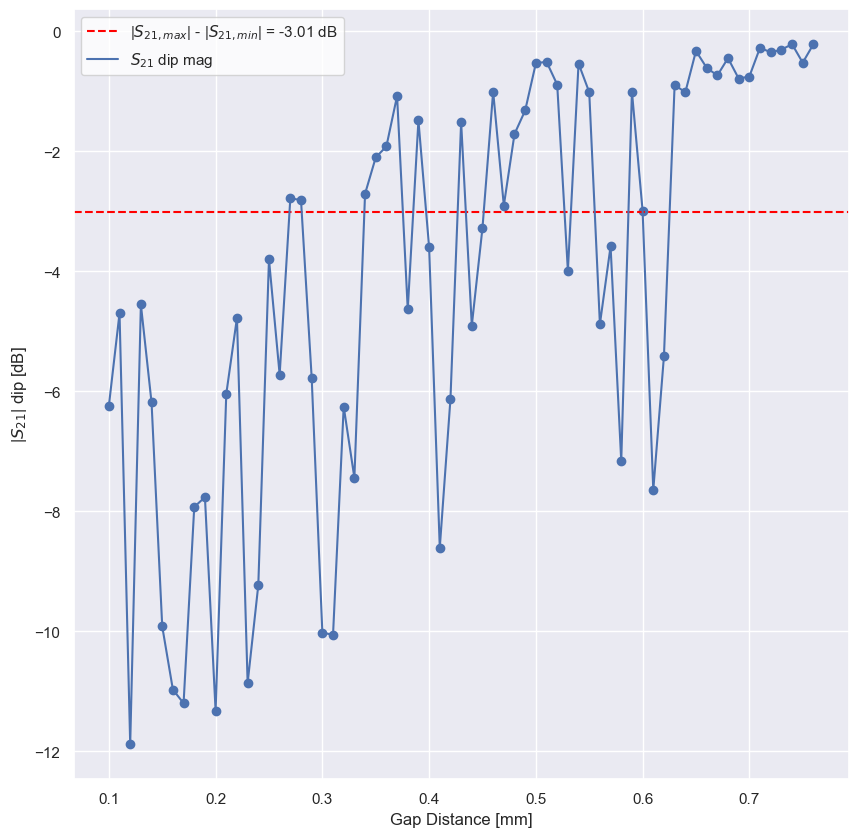

In [82]:
plt.figure(figsize = (10, 10))
plt.grid(True)
plt.axhline(y=-3.01, color='red', ls = 'dashed', label = r'|$S_{21, max}$| - |$S_{21, min}$| = -3.01 dB')
plt.plot(1e3*all_dips_df['gap distance [m]'], all_dips_df['dB dip'], label=r'$S_{21}$ dip mag') # multiply for mm 
plt.scatter(1e3*all_dips_df['gap distance [m]'], all_dips_df['dB dip'])
plt.xlabel('Gap Distance [mm]')
plt.ylabel(r'|$S_{21}$| dip [dB]')
plt.legend()


In [83]:
all_frames = pd.concat([p1_p14, p15_p2, p21_p28, p29_p4, p41_p6, p61_p76])

In [84]:
all_frames

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00010,3.1986,-22.906710,-0.191174
1,0.00010,3.1987,-23.754246,-0.190705
2,0.00010,3.1988,-25.048691,-0.191144
3,0.00010,3.1989,-27.303287,-0.193871
4,0.00010,3.1990,-32.562971,-0.202877
...,...,...,...,...
331,0.00076,3.2002,-25.945135,-0.090811
332,0.00076,3.2003,-25.494449,-0.092014
333,0.00076,3.2004,-25.197729,-0.092947
334,0.00076,3.2005,-24.987754,-0.093676


Text(0.5, 1.0, 'S21 vs. Gap Distance')

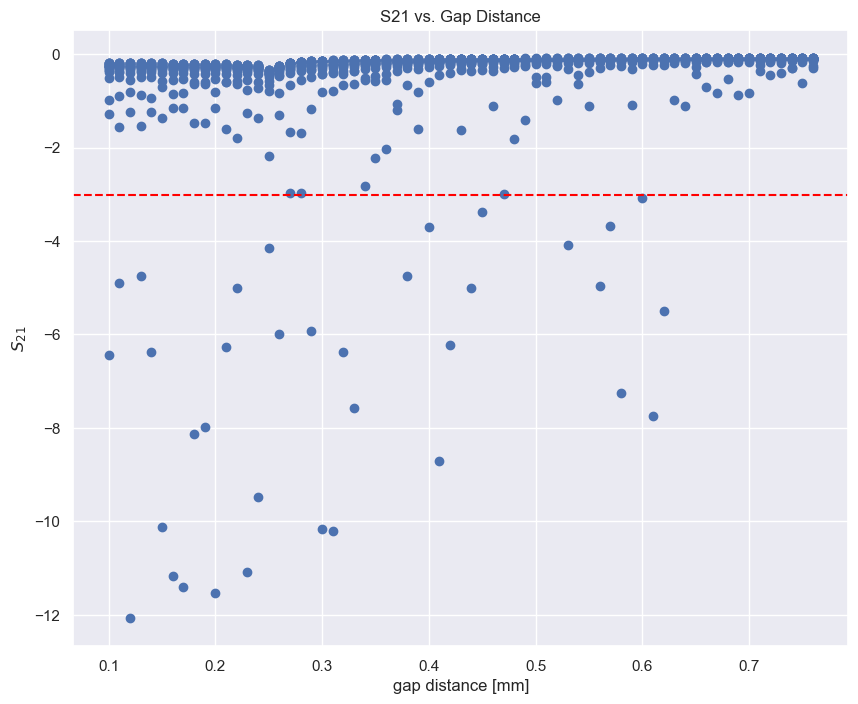

In [85]:
plt.figure(figsize = (10,8))
plt.grid(True)
plt.axhline(y=-3.01, color='red', ls = 'dashed', label = r'|$S_{21, max}$| - |$S_{21, min}$| = -3.01 dB')
plt.scatter(1e3*all_frames['% x_strip (m)'], all_frames['S21 (1)'])
plt.xlabel('gap distance [mm]')
plt.ylabel(r'$S_{21}$')
plt.title('S21 vs. Gap Distance')

Text(0.5, 1.0, 'S21 vs. Gap Distance')

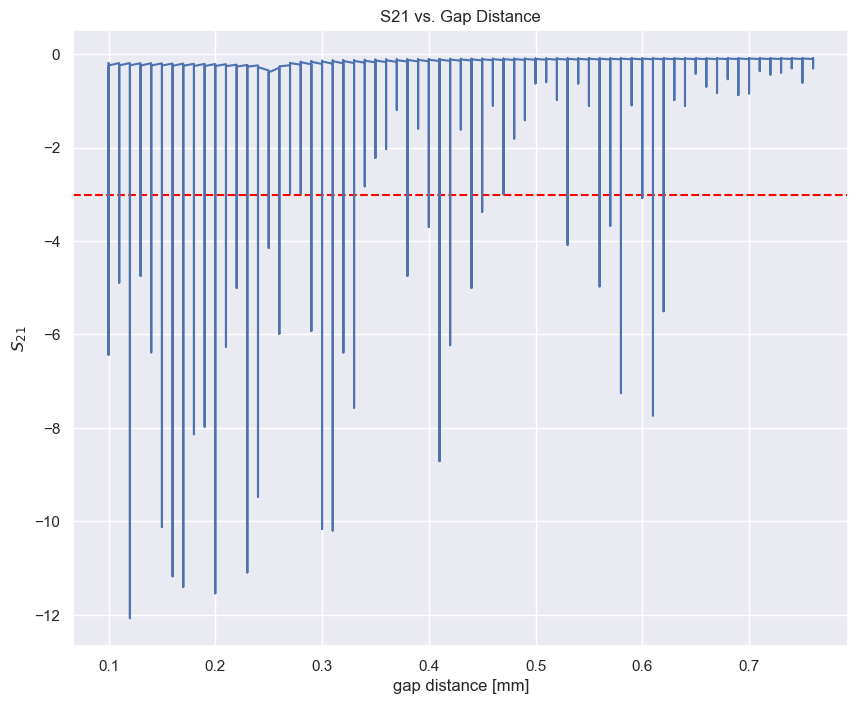

In [100]:
plt.figure(figsize = (10,8))
plt.grid(True)
plt.axhline(y=-3.01, color='red', ls = 'dashed', label = r'|$S_{21, max}$| - |$S_{21, min}$| = -3.01 dB')
plt.plot(1e3*all_frames['% x_strip (m)'], all_frames['S21 (1)'])
plt.xlabel('gap distance [mm]')
plt.ylabel(r'$S_{21}$')
plt.title('S21 vs. Gap Distance')
#plt.xlim(0.1, 0.13)

In [ ]:
plt.plot(p1_1p5_3p4GHz['% x_strip (m)'], p1_1p5_3p4GHz['S21 (1)'], label = '3.416 GHz')

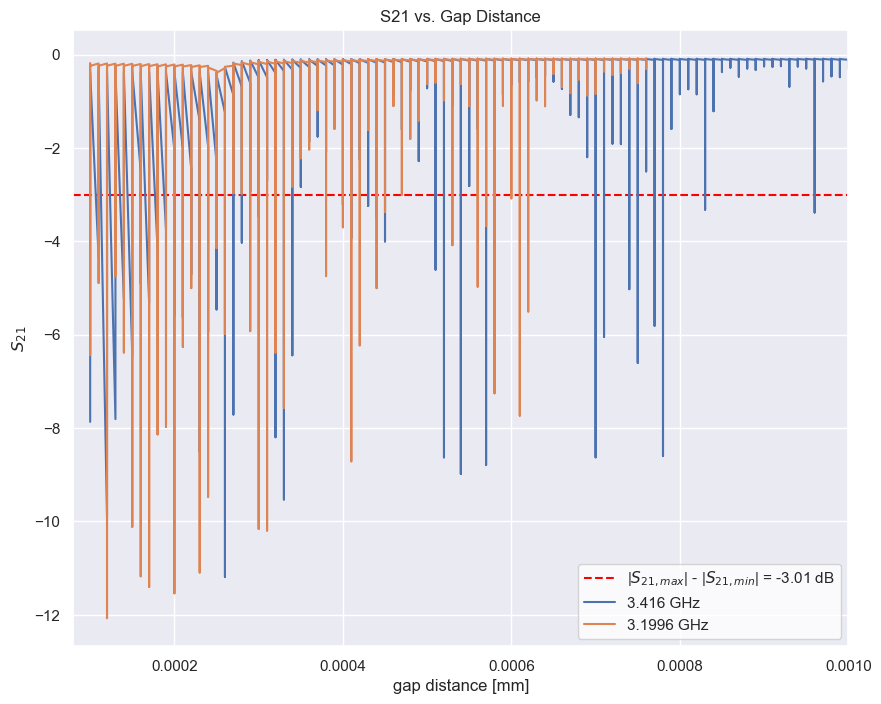

In [87]:
# with both 3.2 and 3.4 GHz

plt.figure(figsize = (10,8))
plt.grid(True)
plt.axhline(y=-3.01, color='red', ls = 'dashed', label = r'|$S_{21, max}$| - |$S_{21, min}$| = -3.01 dB')
plt.plot(p1_1p5_3p4GHz['% x_strip (m)'], p1_1p5_3p4GHz['S21 (1)'], label = '3.416 GHz')
plt.plot(all_frames['% x_strip (m)'], all_frames['S21 (1)'], label = '3.1996 GHz')
plt.xlabel('gap distance [mm]')
plt.ylabel(r'$S_{21}$')
plt.title('S21 vs. Gap Distance')
plt.xlim(0.00008, 0.001)
plt.legend()

In [88]:
# Assuming your DataFrame has columns: 'Gap', 'Frequency', 'S21_dB' (or magnitude), etc.
# Pivot to create a 2D matrix (gap × freq) with S21 magnitude as values
pivoted = all_dips_table.pivot(columns='% x_strip (m)', index='freq (GHz)', values='S21 (1)')  # or 'S21_mag'

In [89]:
all_dips_freq_cut = all_dips_table[(all_dips_table['freq (GHz)']>3.1991) & (all_dips_table['freq (GHz)']<3.1999)]

Text(0.5, 1.0, 'Resonator-Strip Coupling Heatmap')

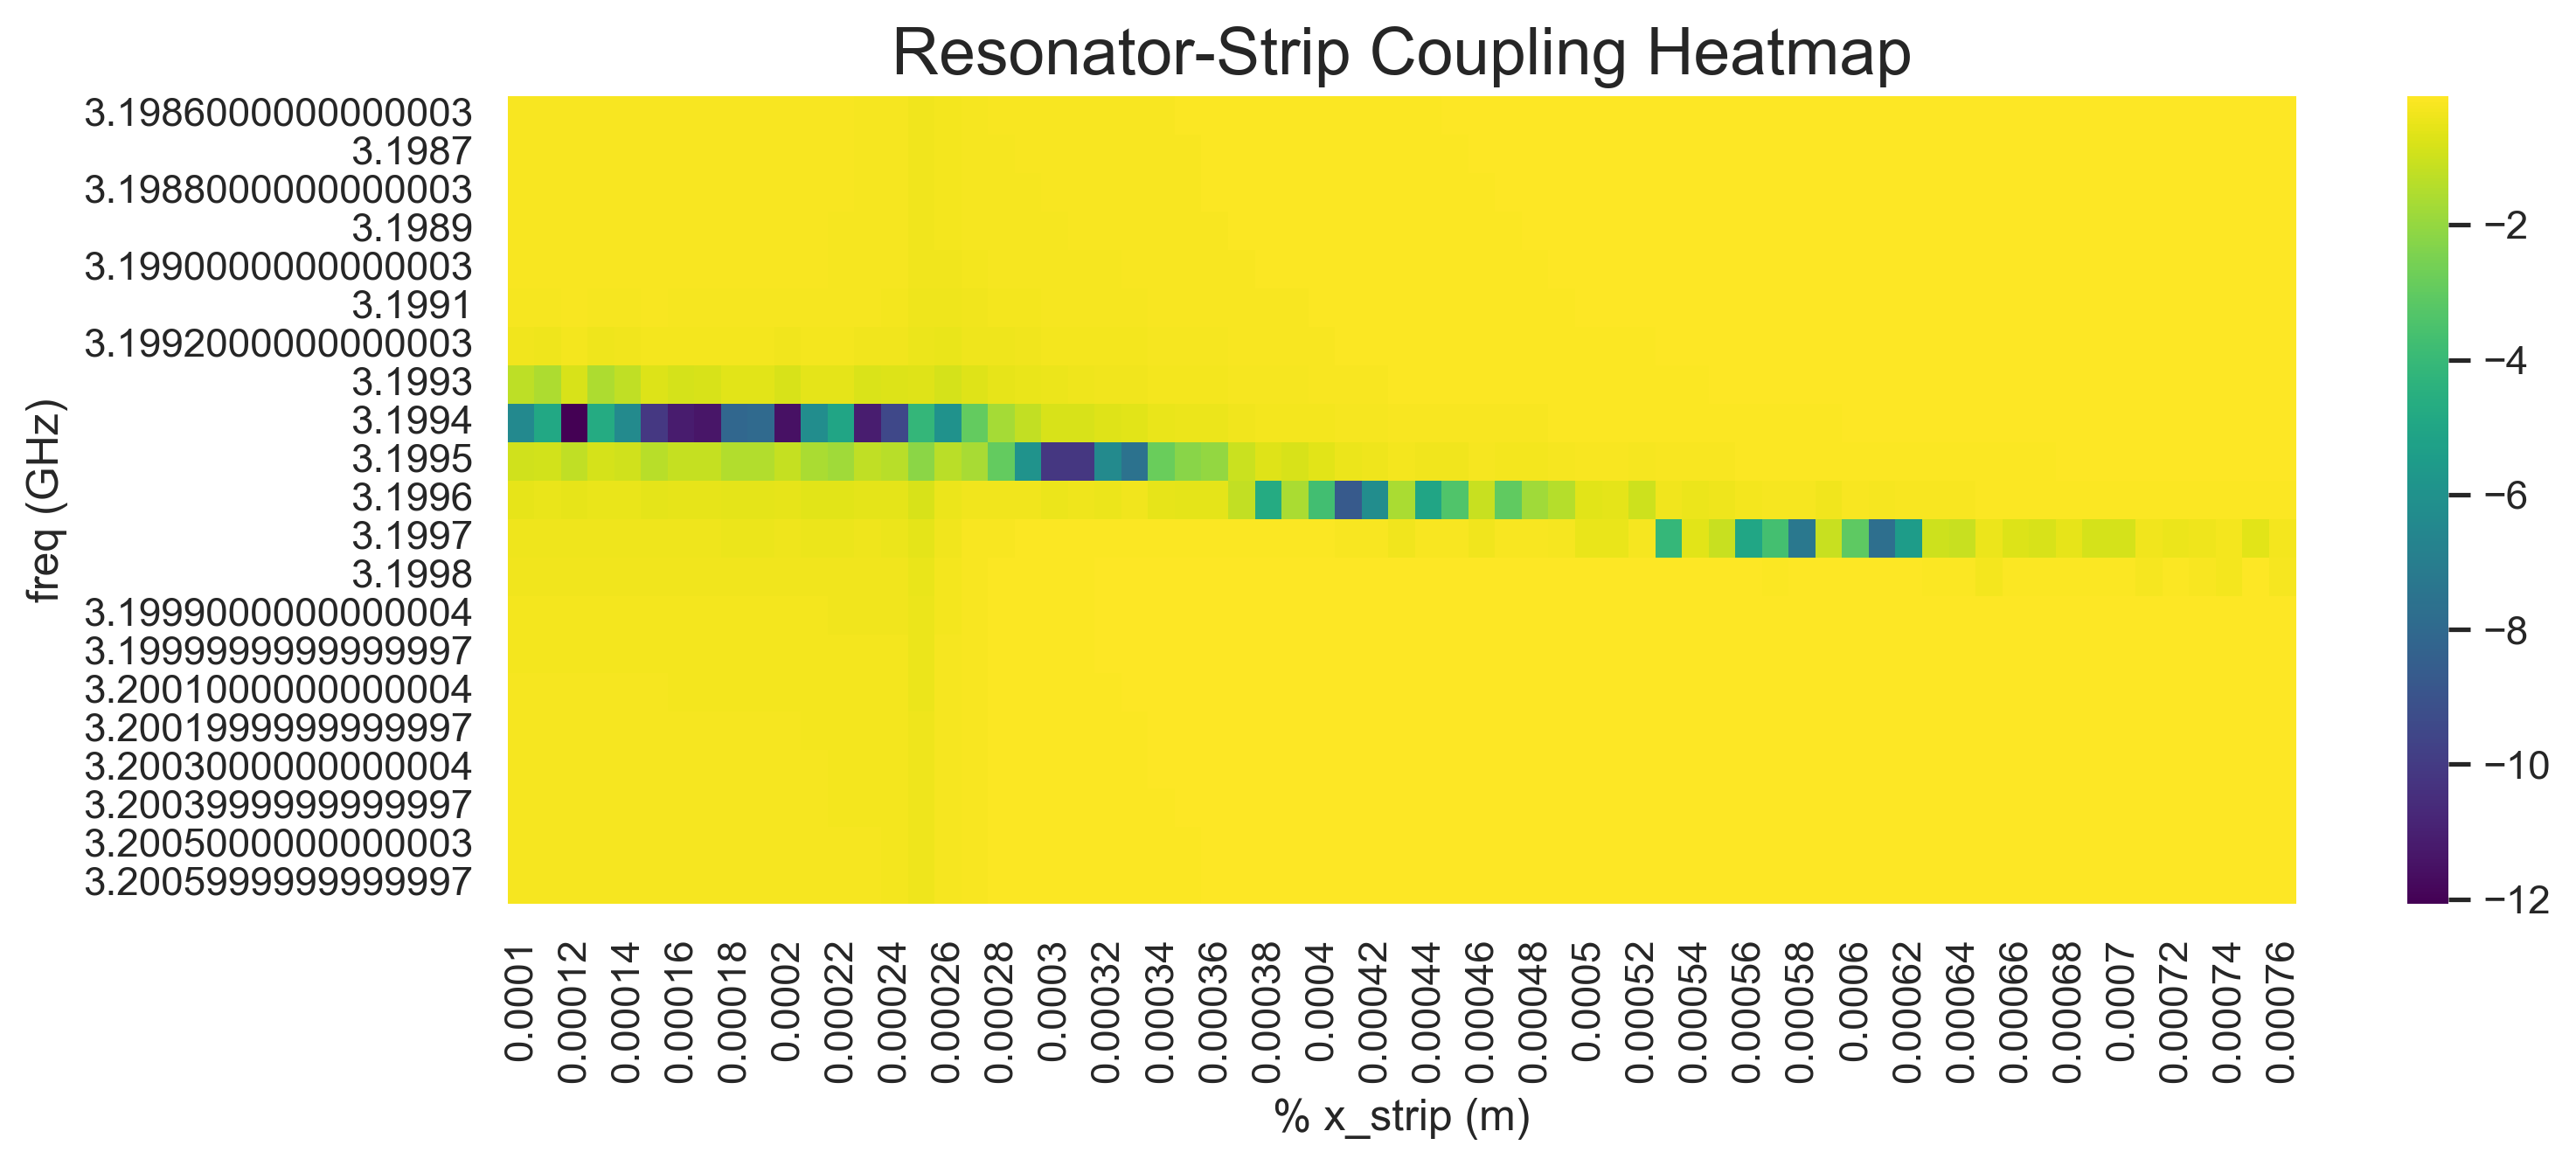

In [130]:
plt.figure(dpi=300, figsize=(11,4))
ax = sns.heatmap(pivoted, cmap='viridis', xticklabels=2, yticklabels=True) #linewidths=0.5, linecolor='gray') center=-2.9,
#colorbar = ax.collections[0].colorbar
#colorbar.set_label('S21 [dB]', fontsize=12)
tick_vals = np.linspace(0, -12, 13)
#colorbar.set_ticks(tick_vals)
plt.title('Resonator-Strip Coupling Heatmap', fontsize=18)

In [91]:
all_dips_freq_cut

,% x_strip (m),freq (GHz),S11 (1),S21 (1),dip_mag
6,0.00010,3.1992,-21.853364,-0.350077,-6.243730
7,0.00010,3.1993,-10.445321,-1.287137,-6.243730
8,0.00010,3.1994,-3.287291,-6.434435,-6.243730
9,0.00010,3.1995,-8.787830,-0.975288,-6.243730
10,0.00010,3.1996,-11.593289,-0.516559,-6.243730
...,...,...,...,...,...
323,0.00076,3.1994,-21.657615,-0.115739,-0.217186
324,0.00076,3.1995,-20.973259,-0.124101,-0.217186
325,0.00076,3.1996,-19.611833,-0.146777,-0.217186
326,0.00076,3.1997,-15.470962,-0.304639,-0.217186


In [92]:
pivoted_cut = all_dips_freq_cut.pivot(columns='% x_strip (m)', index='freq (GHz)', values='S21 (1)')  # or 'S21_mag'

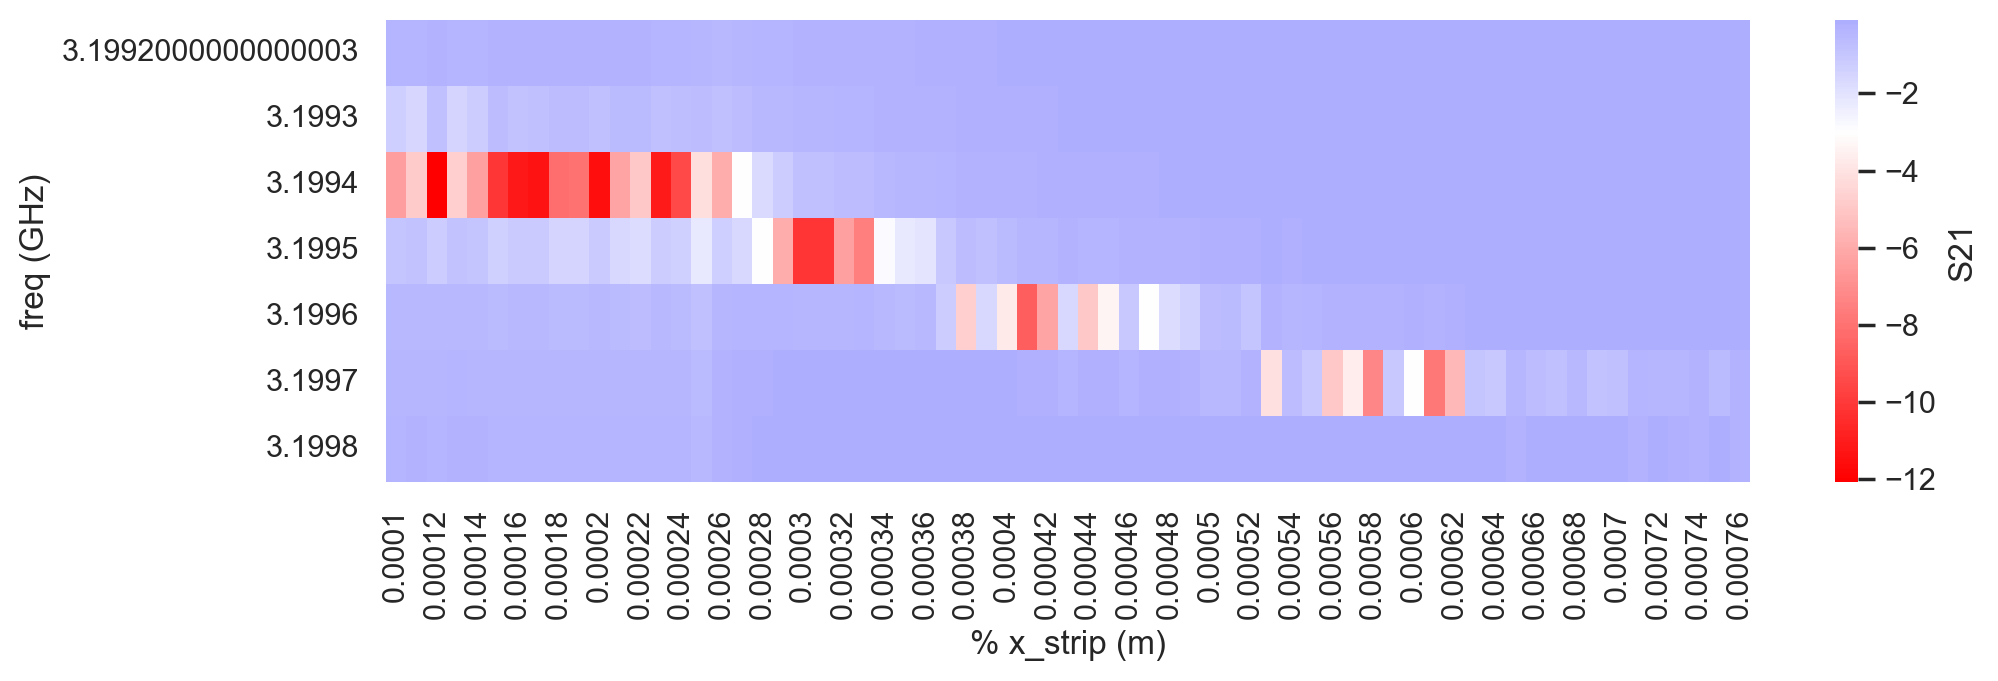

In [93]:
plt.figure(figsize=(11,3), dpi=200)
ax = sns.heatmap(pivoted_cut, cmap='bwr_r', center=-3, xticklabels=2, yticklabels=True)
colorbar = ax.collections[0].colorbar
colorbar.set_label('S21', fontsize=12)
plt.grid(True)

In [94]:
pivoted.index

Index([3.1986000000000003,             3.1987, 3.1988000000000003,
                   3.1989, 3.1990000000000003,             3.1991,
       3.1992000000000003,             3.1993,             3.1994,
                   3.1995,             3.1996,             3.1997,
                   3.1998, 3.1999000000000004, 3.1999999999999997,
       3.2001000000000004, 3.2001999999999997, 3.2003000000000004,
       3.2003999999999997, 3.2005000000000003, 3.2005999999999997],
      dtype='float64', name='freq (GHz)')

In [95]:
# getting dip measurement 

p1p14_dips = p1_p14.copy()
p1p14_dips

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00010,3.1986,-22.906710,-0.191174
1,0.00010,3.1987,-23.754246,-0.190705
2,0.00010,3.1988,-25.048691,-0.191144
3,0.00010,3.1989,-27.303287,-0.193871
4,0.00010,3.1990,-32.562971,-0.202877
...,...,...,...,...
100,0.00014,3.2002,-16.289895,-0.260693
101,0.00014,3.2003,-16.535507,-0.254683
102,0.00014,3.2004,-16.738367,-0.250081
103,0.00014,3.2005,-16.908900,-0.246444


In [96]:
p1 = p1_p14.loc[p1_p14['% x_strip (m)']==0.00010]

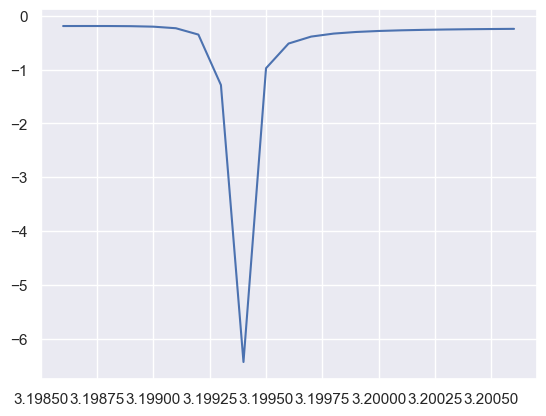

In [97]:
plt.plot(p1['freq (GHz)'], p1['S21 (1)'])

## OLD

In [32]:
S21_p096 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S21_p096mmgap_3p2.csv', skiprows=4)
S21_p126 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S21_p126mmgap_3p2.csv', skiprows=4)
S21_p146 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S21_p146mmgap_3p2.csv', skiprows=4)

In [33]:
S21_p096 = S21_p096.rename(columns={'% freq (GHz)':'freq[GHz]', 'S11 (1)': 'S11', 'S21 (1)': 'S21'})
S21_p126 = S21_p126.rename(columns={'% freq (GHz)':'freq[GHz]', 'S11 (1)': 'S11', 'S21 (1)': 'S21'})
S21_p146 = S21_p146.rename(columns={'% freq (GHz)':'freq[GHz]', 'S11 (1)': 'S11', 'S21 (1)': 'S21'})

In [34]:
from matplotlib.ticker import MultipleLocator

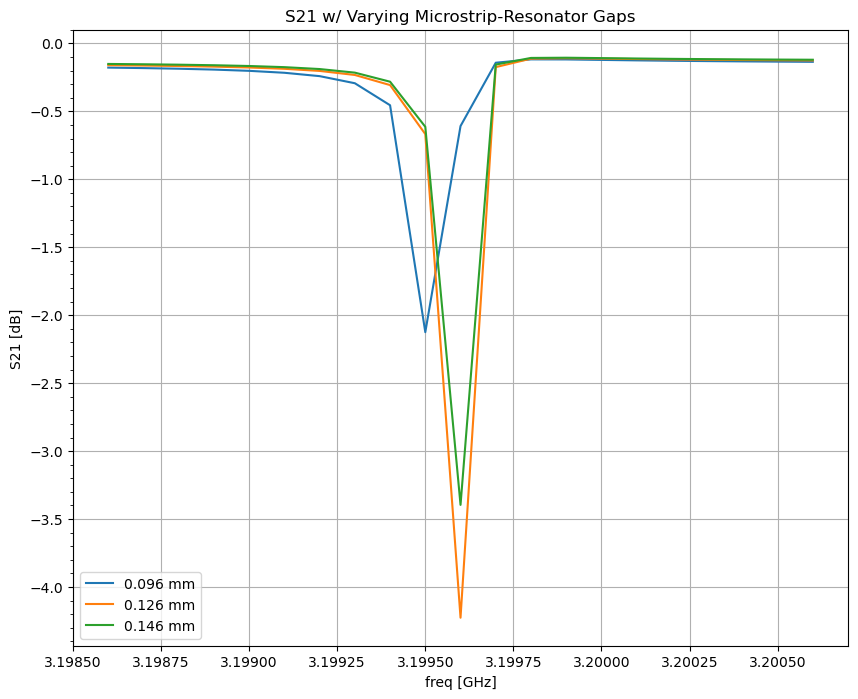

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
# Major ticks every 0.2
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.plot(S21_p096['freq[GHz]'], S21_p096['S21'], label='0.096 mm')
ax.plot(S21_p126['freq[GHz]'], S21_p126['S21'], label='0.126 mm')
ax.plot(S21_p146['freq[GHz]'], S21_p146['S21'], label='0.146 mm')

ax.set_xlabel('freq [GHz]')
ax.set_ylabel('S21 [dB]')
ax.set_title('S21 w/ Varying Microstrip-Resonator Gaps')
ax.legend()
ax.grid(True)


In [41]:
# S21 dips 

p096dip_S21 = min(S21_p096['S21']) - max(S21_p096['S21'])
p126dip_s21 = min(S21_p126['S21']) - max(S21_p126['S21'])
p146dip_s21 = min(S21_p146['S21']) - max(S21_p146['S21'])

print(p096dip_S21, p126dip_s21, p146dip_s21)

-2.0071431657881904 -4.116385750706802 -3.2901005491879163


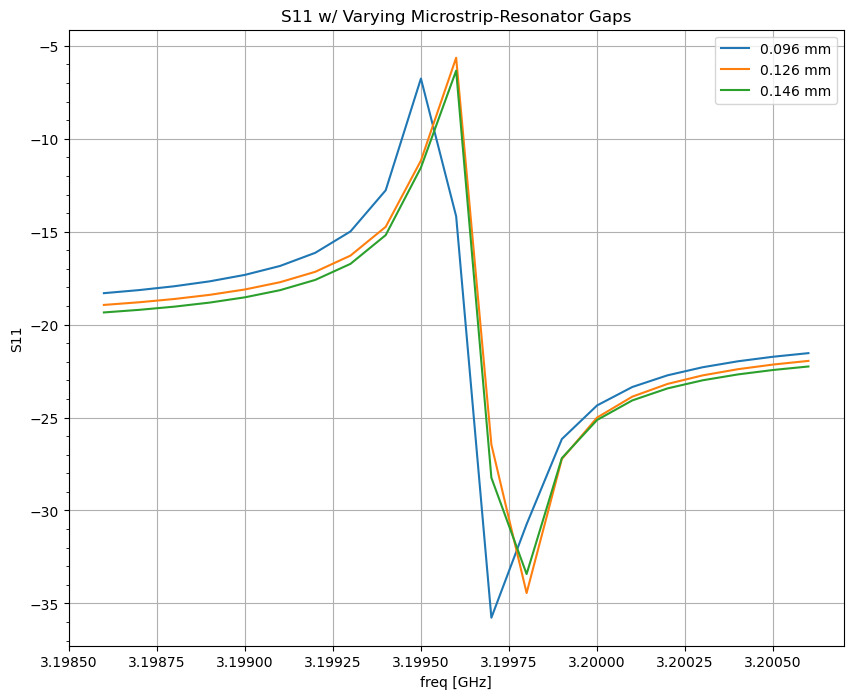

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
# Major ticks every 0.2
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.plot(S21_p096['freq[GHz]'], S21_p096['S11'], label='0.096 mm')
ax.plot(S21_p126['freq[GHz]'], S21_p126['S11'], label='0.126 mm')
ax.plot(S21_p146['freq[GHz]'], S21_p146['S11'], label='0.146 mm')
ax.set_xlabel('freq [GHz]')
ax.set_ylabel('S11')
ax.set_title('S11 w/ Varying Microstrip-Resonator Gaps')
ax.legend()
ax.grid(True)

In [36]:
# stats

print('0.096 mm gap S21 (min, max): (' + str(min(S21_p096['S21'])))#, max(S21_p096['S21']))) + ')')

0.096 mm gap S21 (min, max): (-2.124828766517031


In [37]:
# 
p096min_S21 = min(S21_p096['S21'])
p096max_S21 = max(S21_p096['S21'])
p096min_S11 = min(S21_p096['S11'])
p096max_S11 = max(S21_p096['S21'])

print(str(p096min_S21), str(p096max_S21))

-2.124828766517031 -0.1176856007288409


In [38]:
range(S21_p096['S21'])

TypeError: 'Series' object cannot be interpreted as an integer

In [45]:
# snells law stuff
freq = 3.2*10**9

k_t = 2*cmath.pi*freq/const.c
n_i = 3.07
n_t = 1
n_ti = n_t/n_i 
E_0 = 1e-4
r = np.arange(0.00001, 0.00002, 0.000001)
evan = E_0*cmath.e**(-k_t*(-(1/(n_ti**2)) - 1)*r)

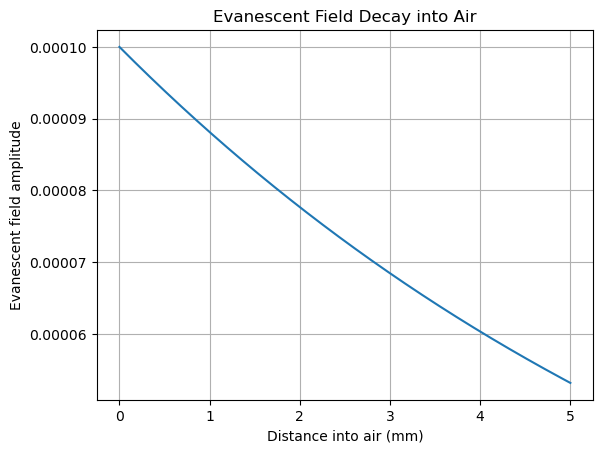

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c

# Constants
freq = 3.2e9  # Hz
n_i = 3.07  # alumina
n_t = 1     # air
theta_i_deg = 44# must be > critical angle
theta_i = np.radians(theta_i_deg)

# Wavevector in vacuum
k_0 = 2 * np.pi * freq / c

# Check for total internal reflection
if np.sin(theta_i) <= n_t / n_i:
    raise ValueError("No total internal reflection — evanescent wave won't form.")

# Decay constant (imaginary part of k_z in transmitted medium)
kappa = k_0 * np.sqrt((n_i * np.sin(theta_i))**2 - n_t**2)

# Spatial domain
r = np.linspace(0, 5e-3, 500)  # 5 mm depth into air

# Evanescent field
E_0 = 1e-4
E = E_0 * np.exp(-kappa * r)

# Plot
plt.plot(r * 1e3, E.real)
plt.xlabel('Distance into air (mm)')
plt.ylabel('Evanescent field amplitude')
plt.title('Evanescent Field Decay into Air')
plt.grid(True)
plt.show()

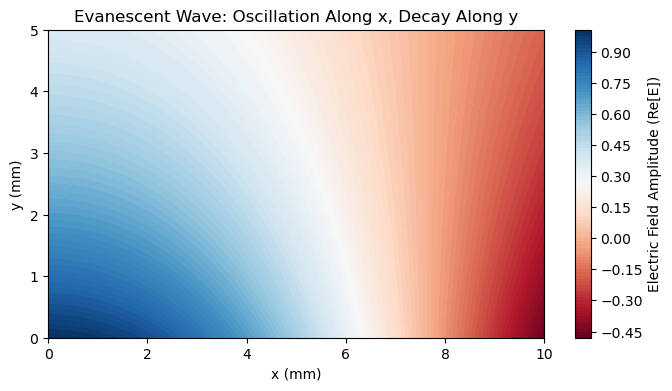

In [74]:
# Constants
freq = 3.2e9  # Hz
omega = 2 * np.pi * freq
n_i = 3.07  # alumina
n_t = 1     # air
theta_i_deg = 90  # degrees, must be > critical angle
theta_i = np.radians(theta_i_deg)

# Wavevector in vacuum
k_0 = 2 * np.pi * freq / c

# Tangential and perpendicular components
k_x = k_0 * n_i * np.sin(theta_i)  # real
kappa = k_0 * np.sqrt((n_i * np.sin(theta_i))**2 - n_t**2)  # decay constant

# Spatial grid
x = np.linspace(0, 10e-3, 500)  # 10 mm
y = np.linspace(0, 5e-3, 250)   # 5 mm into air
X, Y = np.meshgrid(x, y)

# Evanescent field (real part at t = 0)
E_0 = 1
E = E_0 * np.exp(1j * k_x * X) * np.exp(-kappa * Y)
E_real = np.real(E)

# Plot
plt.figure(figsize=(8, 4))
contour = plt.contourf(X * 1e3, Y * 1e3, E_real, levels=100, cmap='RdBu')
plt.colorbar(contour, label='Electric Field Amplitude (Re[E])')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Evanescent Wave: Oscillation Along x, Decay Along y')
plt.show()

In [69]:
evan

array([0.0001007 , 0.00010077, 0.00010084, 0.00010091, 0.00010098,
       0.00010105, 0.00010112, 0.0001012 , 0.00010127, 0.00010134,
       0.00010141])

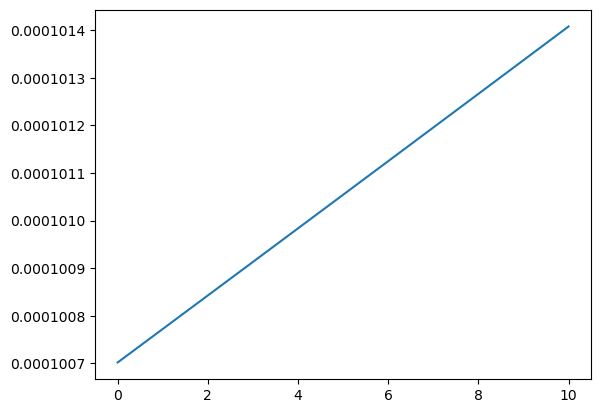

In [70]:
plt.plot(evan)